In [82]:
import pandas as pd
from sklearn import preprocessing
import glob
import os



In [83]:
list_of_test_files = glob.glob("out/out_test*.csv")
list_of_test_files.sort(key=os.path.getmtime)
last_test_file = list_of_test_files[-1]
list_of_train_files = glob.glob("out/out_train*.csv")
list_of_train_files.sort(key=os.path.getmtime)
last_train_file = list_of_train_files[-1]

print(last_test_file)
print(last_train_file)

out/out_test_20200504-092251.csv
out/out_train_20200504-092237.csv


In [84]:
new_data = pd.read_csv(last_test_file, usecols=['city', 'weekofyear', 'total_cases'])
# worst_data = pd.read_csv('out/out20200421-122140.csv', usecols=['total_cases'])
best_data_reg = pd.read_csv('out/out20200325-212033.csv', usecols=['total_cases'])
best_data = pd.read_csv('out/out20200330-235514.csv', usecols=['total_cases'])
# worst_data = pd.read_csv('out/out20200420-170052.csv', usecols=['total_cases'])
train_data = pd.read_csv('dengue_features_train_with_out.csv')
train_data_out = pd.read_csv(last_train_file, usecols=['total_cases'])

In [85]:
new_data['best_total_cases'] = best_data['total_cases'].astype(int)
new_data['best_data_reg'] = best_data_reg['total_cases'].astype(int)
# new_data['worst_data'] = worst_data['total_cases'].astype(int)
new_data['total_cases'] = new_data['total_cases'].astype(int)

In [86]:
num = 3
new_data.iloc[-num:].append(new_data, ignore_index=True)

,city,weekofyear,total_cases,best_total_cases,best_data_reg
0,iq,24,2,7,6
1,iq,25,3,2,4
2,iq,26,2,1,6
3,sj,18,2,3,2
4,sj,19,3,4,13
...,...,...,...,...,...
414,iq,22,4,4,5
415,iq,23,4,4,7
416,iq,24,2,7,6
417,iq,25,3,2,4


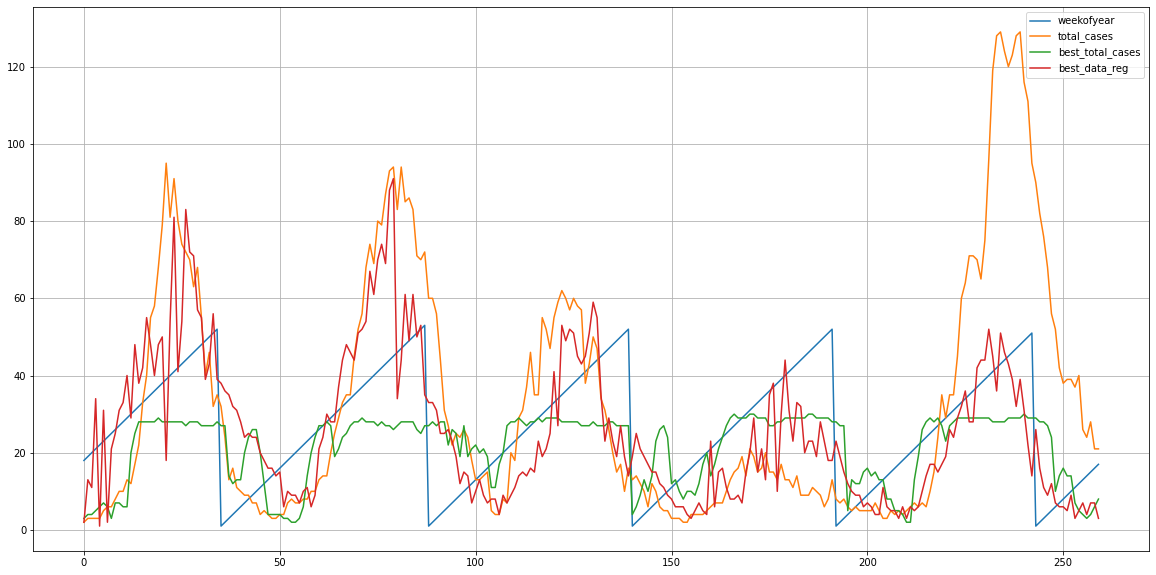

In [87]:
new_data[new_data['city'] == 'sj'].plot(figsize=(20,10), grid=True)

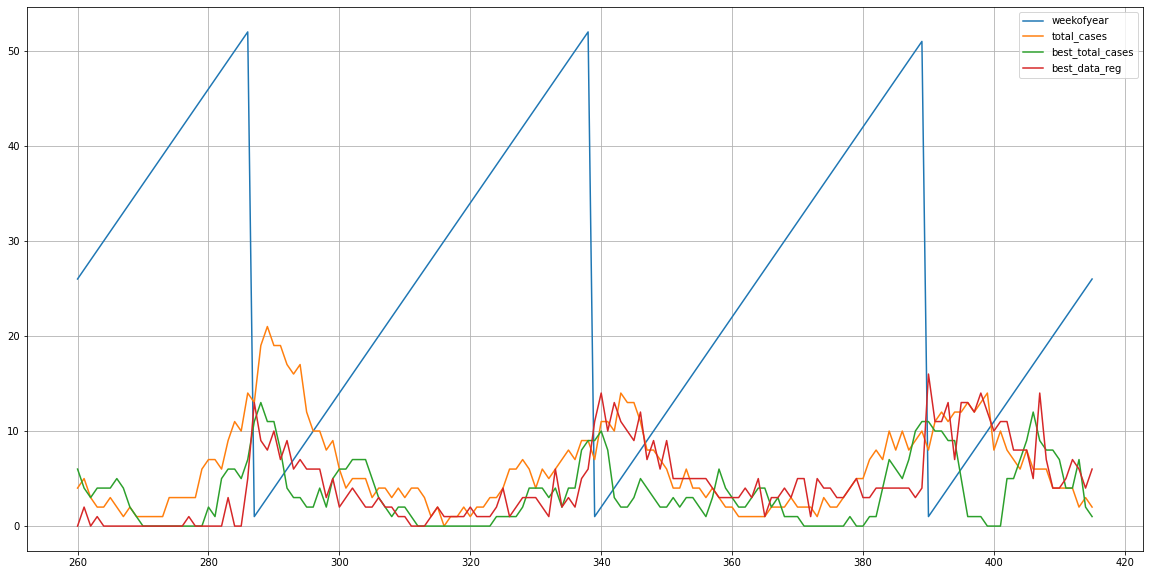

In [88]:
new_data[new_data['city'] == 'iq'].plot(figsize=(20,10), grid=True)

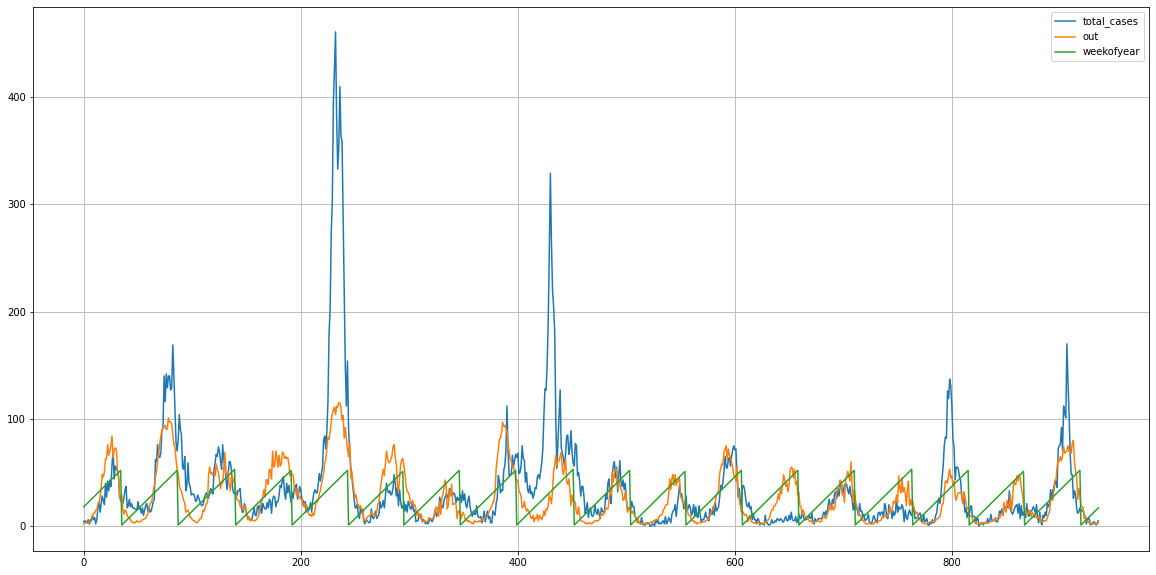

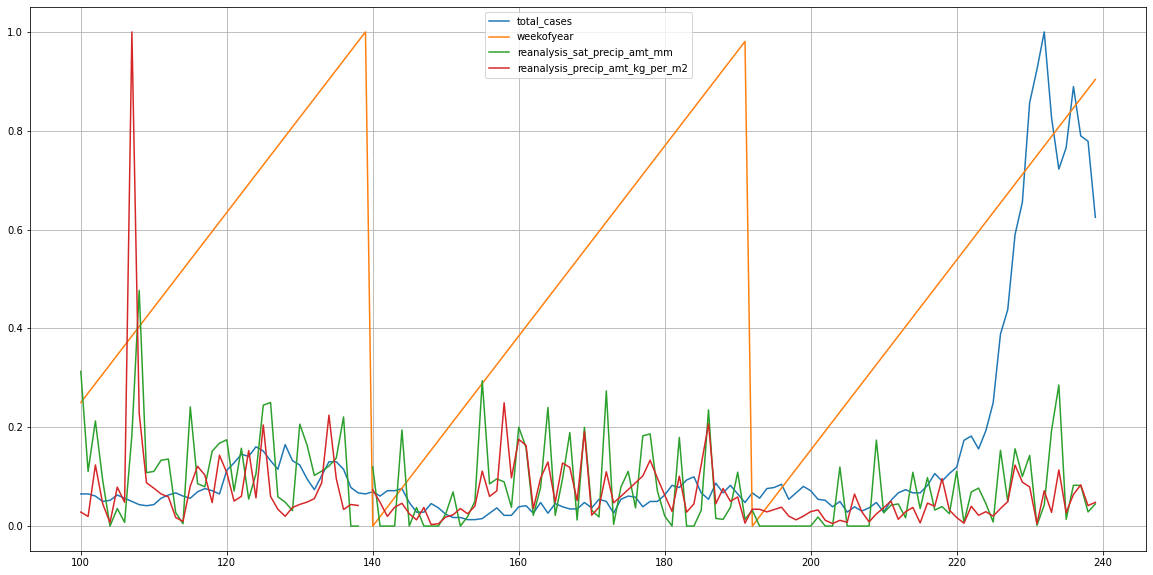

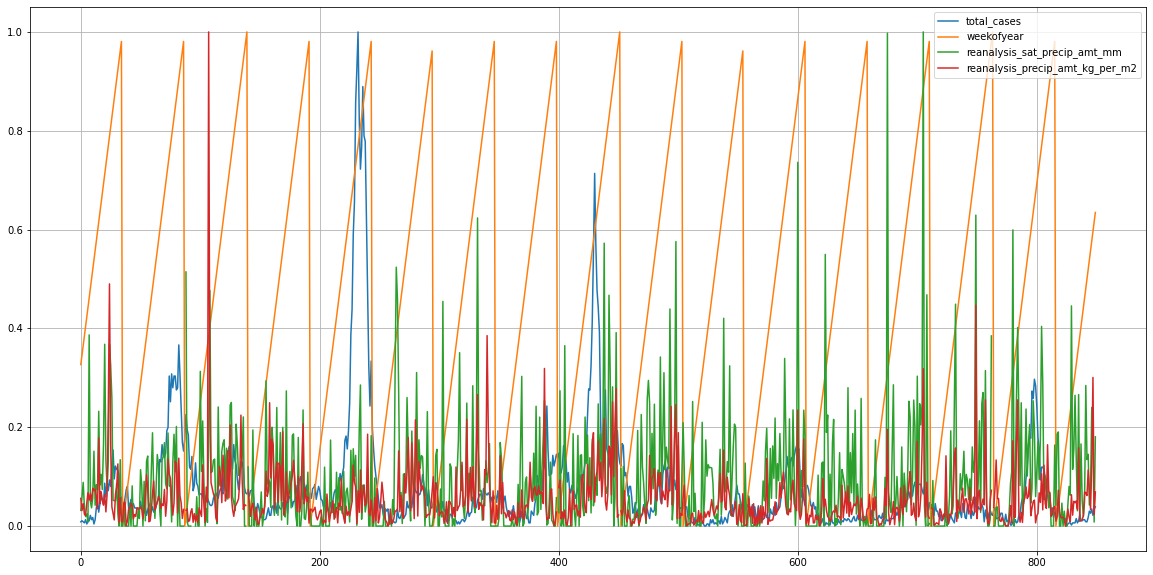

In [89]:
train_data['out'] = train_data_out['total_cases']
train_data[train_data['city'] == 'sj'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)
new_cols = ['total_cases', 'weekofyear', 
#             'station_precip_mm', 'precipitation_amt_mm', 
            'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2'
           ]
x = train_data[train_data['city'] == 'sj'][new_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = new_cols
# df[400:800].plot(figsize=(20,10), grid=True)
df[100:240].plot(figsize=(20,10), grid=True)
# df[400:500].plot(figsize=(20,10), grid=True)
df[0:850].plot(figsize=(20,10), grid=True)

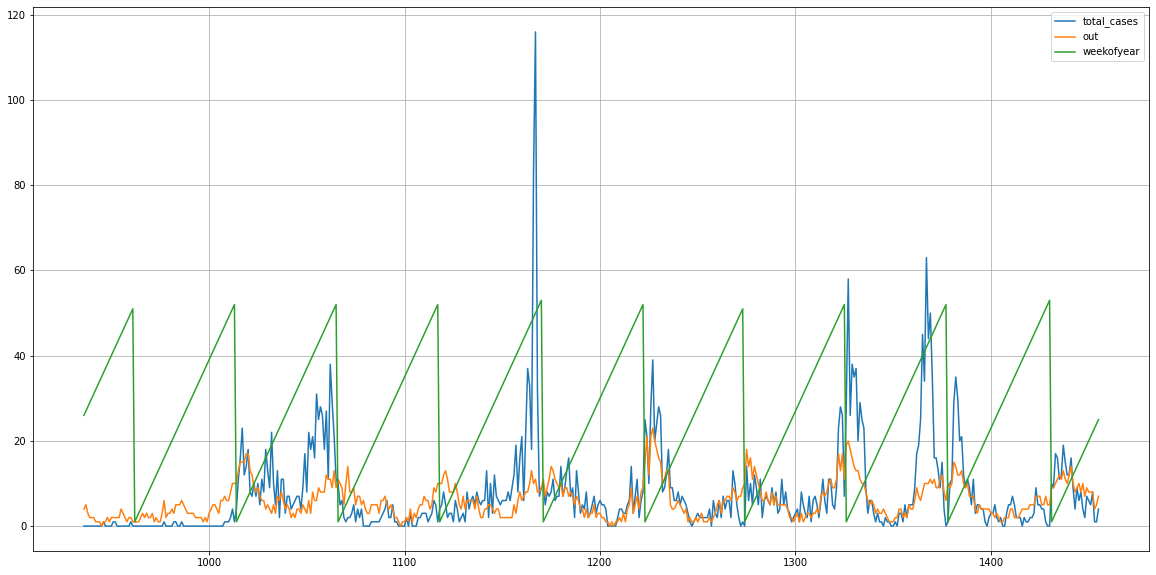

In [90]:
train_data[train_data['city'] == 'iq'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)